In [143]:
#import data from files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [144]:
infiles = [
    "maxLatenciesCBSMaxLatency.csv",
    "maxLatenciesCBSMaxLatency_wSIS.csv",
    # "maxLatenciesCBSMaxLatency_wCF.csv",
    "maxLatenciesCBSMaxLatency_wCF_wCIS.csv",
    "maxLatenciesCBSMaxLatency_wCF_wCIS_KMFS.csv"
]

In [145]:
calculated = dict()
filtered_calculated = dict()
filtered_calculatedStages = dict()
for infile in infiles:
    setting = infile.split("maxLatenciesCBSMaxLatency")[1].split(".csv")[0].replace("_", " ")
    calculated[setting] = pd.read_csv(infile)
    filtered_calculatedStages[setting] = calculated[setting][calculated[setting][' Note'].str.contains('Stages=5queue')]
    filtered_calculated[setting] = {
        # "PFaster": dict(), 
        # "PFasterV2": dict(),
        # "P100": dict(), 
        # "BA": dict(), 
        "Q": dict(), 
        "QHaeckel": dict(),
        "QHaeckelReverse": dict()
        }
    for row in filtered_calculatedStages[setting].iterrows():
        inputCount = int(row[1][' Note'].split("Inputs=")[1].split("-")[0])
        # filtered_calculated[setting]["PFasterV2"][inputCount] = row[1][" PFasterV2"]
        # filtered_calculated[setting]["PFaster"][inputCount] = row[1][" PFaster"]
        # filtered_calculated[setting]["P100"][inputCount] = row[1][" P100"]
        # filtered_calculated[setting]["BA"][inputCount] = row[1][" BA"]
        filtered_calculated[setting]["Q"][inputCount] = row[1][" Q"]
        filtered_calculated[setting]["QHaeckel"][inputCount] = row[1][" QHaeckel"]
        filtered_calculated[setting]["QHaeckelReverse"][inputCount] = row[1][" QHaeckelR"]


In [146]:
variableSlopeSim = pd.read_json('variableSlopeQueueDelay.json')
filtered_variableSlopeSim = dict()
#iterate over studies
for study in variableSlopeSim:
    # filter for itervars "S" = 5
    if(variableSlopeSim[study]["itervars"]["S"] == "5"):
        # get inputCount
        inputCount = int(variableSlopeSim[study]["itervars"]["IL"])
        for vector in variableSlopeSim[study]["vectors"]:
            if vector["name"] == "delay:vector":
                filtered_variableSlopeSim[inputCount] = np.max(vector["value"])
# sort according to inputCount
filtered_variableSlopeSim = dict(sorted(filtered_variableSlopeSim.items()))
filtered_variableSlopeSim

{1: 0.000123059913,
 2: 0.000290699116,
 3: 0.000325866607,
 4: 0.00033747481,
 5: 0.000347443936,
 6: 0.000322710307,
 7: 0.000330419672,
 8: 0.00033855824699999997,
 9: 0.000368201984,
 10: 0.00037727,
 11: 0.000356234633,
 12: 0.000342051477,
 13: 0.000352949236}

In [147]:

fixedSlopeSim = pd.read_json('fixedSlopeQueueDelay.json')
filtered_fixedSlopeSim = dict()
#iterate over studies
for study in fixedSlopeSim:
    # filter for itervars "S" = 5
    if(fixedSlopeSim[study]["itervars"]["S"] == "5"):
        # get inputCount
        inputCount = int(fixedSlopeSim[study]["itervars"]["IL"])
        for vector in fixedSlopeSim[study]["vectors"]:
            if vector["name"] == "delay:vector":
                filtered_fixedSlopeSim[inputCount] = np.max(vector["value"])
filtered_fixedSlopeSim = dict(sorted(filtered_fixedSlopeSim.items()))
filtered_fixedSlopeSim

{1: 0.00012303500000000002,
 2: 0.0007792150000000001,
 3: 0.0007943150000000001,
 4: 0.0008002150000000001,
 5: 0.0008057950000000001,
 6: 0.000808415,
 7: 0.0008094350000000001,
 8: 0.000809895,
 9: 0.0008121150000000001,
 10: 0.000812655,
 11: 0.000810155,
 12: 0.0008089350000000001,
 13: 0.000813315}

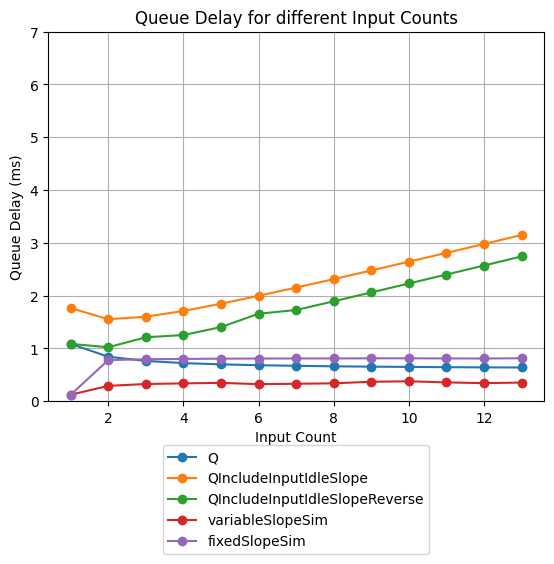

In [148]:
for key in filtered_calculated[""]:
    plt.plot(filtered_calculated[""][key].keys(), [value * 1000 for value in filtered_calculated[""][key].values()], 'o-', label=key.replace("Haeckel", "IncludeInputIdleSlope"))
plt.plot(filtered_variableSlopeSim.keys(), [value * 1000 for value in filtered_variableSlopeSim.values()], 'o-', label='variableSlopeSim')
plt.plot(filtered_fixedSlopeSim.keys(), [value * 1000 for value in filtered_fixedSlopeSim.values()], 'o-', label='fixedSlopeSim')
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 7)
plt.grid(True)  # Add this line to show grid lines

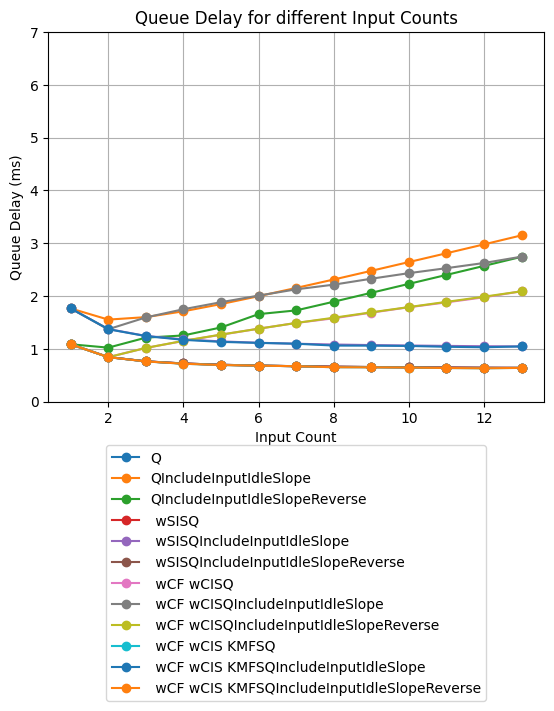

In [149]:
for file in filtered_calculated:
    for key in filtered_calculated[file]:
        plt.plot(filtered_calculated[file][key].keys(), [value * 1000 for value in filtered_calculated[file][key].values()], 'o-', label=file + key.replace("Haeckel", "IncludeInputIdleSlope"))
# plt.plot(filtered_variableSlopeSim.keys(), [value * 1000 for value in filtered_variableSlopeSim.values()], 'o-', label='variableSlopeSim')
# plt.plot(filtered_fixedSlopeSim.keys(), [value * 1000 for value in filtered_fixedSlopeSim.values()], 'o-', label='fixedSlopeSim')
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 7)
plt.grid(True)  # Add this line to show grid lines


In [150]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot for filtered_calculated
for i, file in enumerate(filtered_calculated):
    for j, key in enumerate(filtered_calculated[file]):
        axs[i//2, i%2].plot(filtered_calculated[file][key].keys(), [value * 1000 for value in filtered_calculated[file][key].values()], 'o-', label=file + key.replace("Haeckel", "IncludeInputIdleSlope"))
        # add title to each subplot
        axs[i//2, i%2].set_title(file.replace("wCF","with Cross Flows").replace("wSIS","with Static Idle Slope").replace("wCIS","with Calculated Idle Slopes").replace("KMFS","Keep Max Flow Size"))
        # Set y-axis limit to 0-6
        axs[i//2, i%2].set_ylim(0, 6)
        axs[i//2, i%2].plot(filtered_variableSlopeSim.keys(), [value * 1000 for value in filtered_variableSlopeSim.values()], 'o-', label='variableSlopeSim')
        axs[i//2, i%2].plot(filtered_fixedSlopeSim.keys(), [value * 1000 for value in filtered_fixedSlopeSim.values()], 'o-', label='fixedSlopeSim')

# Set common labels and title
fig.text(0.5, 0.04, 'Input Count', ha='center')
fig.text(0.04, 0.5, 'Queue Delay (ms)', va='center', rotation='vertical')
fig.suptitle('Queue Delay for different Input Counts')

# Add legend
handles, labels = axs[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.1))


# Show grid lines
for ax in axs.flat:
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


SyntaxError: '(' was never closed (2606690756.py, line 8)

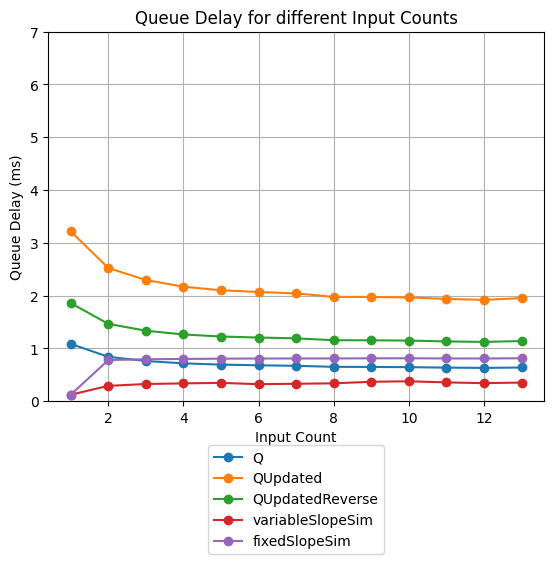

In [16]:
# plot only the wCF wCIS KMFS Q
fig, ax = plt.subplots()
for file in filtered_calculated:
    if "KMFS" in file:
        for key in filtered_calculated[file]:
            if "Q" in key:
                ax.plot(filtered_calculated[file][key].keys(), [value * 1000 for value in filtered_calculated[file][key].values()], 'o-', label=file.replace("wCF","").replace("wCIS","").replace("KMFS","").strip() + key.replace("Haeckel", "Updated"))
ax.plot(filtered_variableSlopeSim.keys(), [value * 1000 for value in filtered_variableSlopeSim.values()], 'o-', label='variableSlopeSim')
ax.plot(filtered_fixedSlopeSim.keys(), [value * 1000 for value in filtered_fixedSlopeSim.values()], 'o-', label='fixedSlopeSim')
plt.xlabel('Input Count')
plt.ylabel('Queue Delay (ms)')
plt.title('Queue Delay for different Input Counts')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1))
plt.ylim(0, 7)
plt.grid(True)  # Add this line to show grid lines
plt.show()
